## 2D HISTOGRAM PLOTS — FULL GUIDE

### Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### We use synthetic continuous data:

In [3]:
np.random.seed(42)
x = np.random.normal(loc=5, scale=1.5, size=5000)
y = 0.8 * x + np.random.normal(0, 1, size=5000)


### Basic 2D Histogram (plt.hist2d)

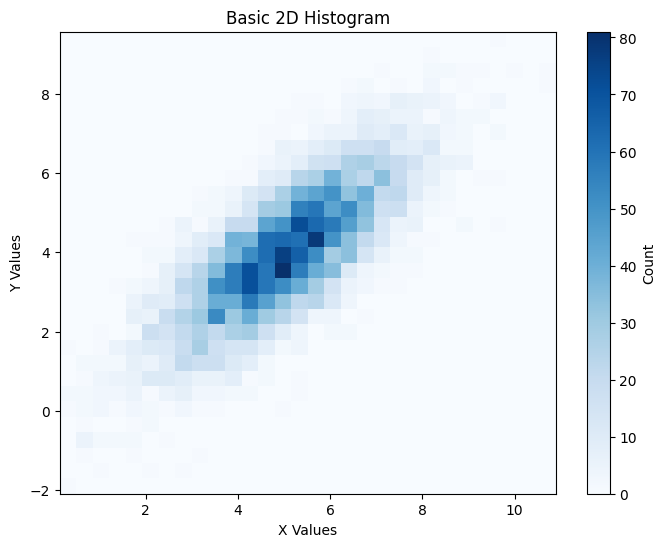

In [4]:
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap='Blues')

plt.colorbar(label="Count")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Basic 2D Histogram")
plt.show()


### 2D Histogram with Adjustable Bin Sizes

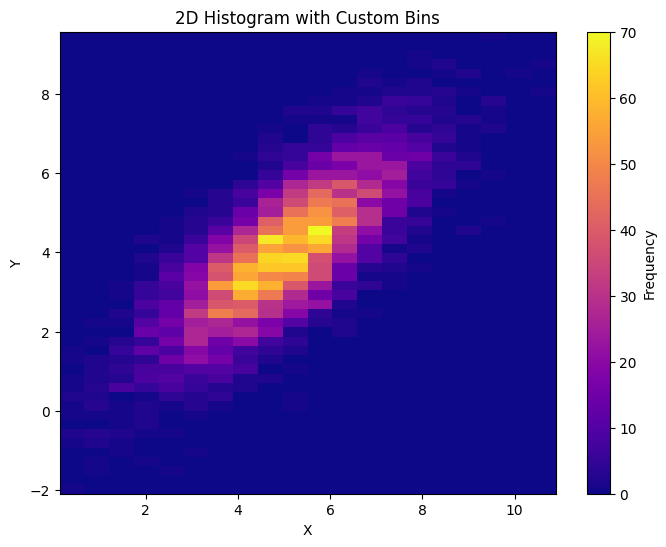

In [5]:
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=[20, 50], cmap="plasma")   # X has 20 bins, Y has 50

plt.colorbar(label="Frequency")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram with Custom Bins")
plt.show()


### 2D Histogram With Color Intensity (Density style)

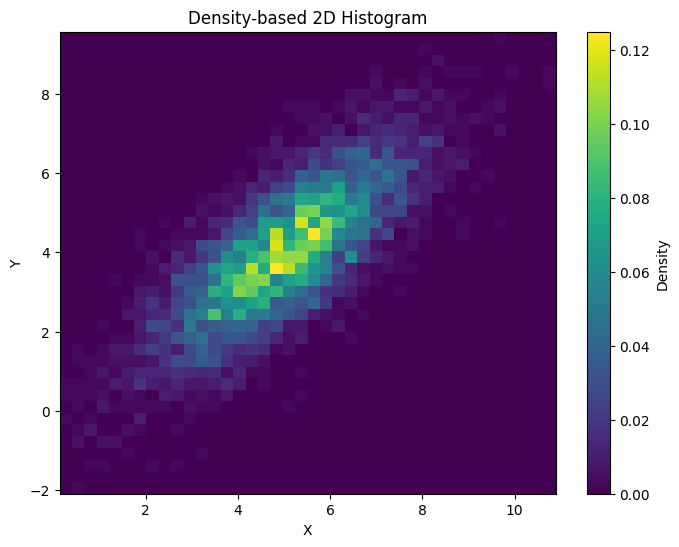

In [6]:
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=40, density=True, cmap='viridis')

plt.colorbar(label="Density")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Density-based 2D Histogram")
plt.show()


### 2D Histogram with Log Color Scale

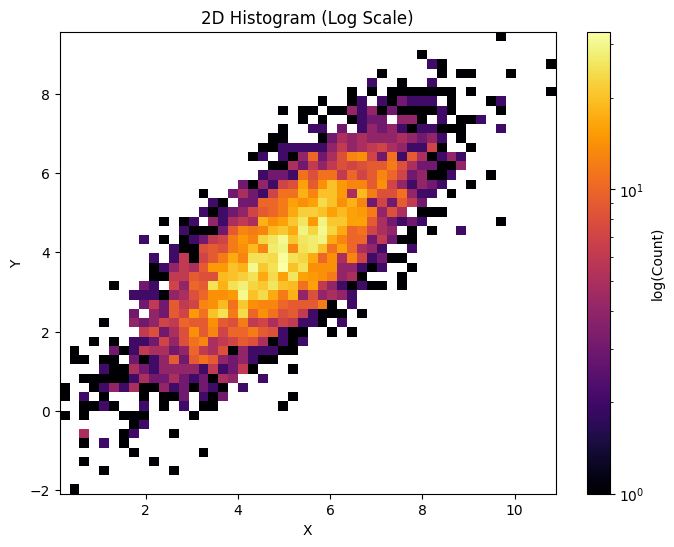

In [7]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=50, norm=LogNorm(), cmap='inferno')

plt.colorbar(label="log(Count)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram (Log Scale)")
plt.show()


### Hexbin + Log Color Scale

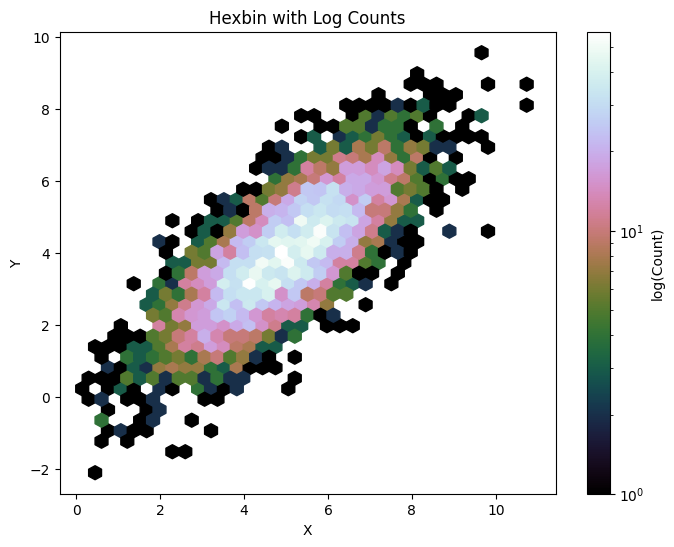

In [8]:
plt.figure(figsize=(8, 6))
plt.hexbin(x, y, gridsize=35, cmap='cubehelix', bins='log')

plt.colorbar(label="log(Count)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Hexbin with Log Counts")
plt.show()


### 2D Histogram With Colorbar and Gridlines

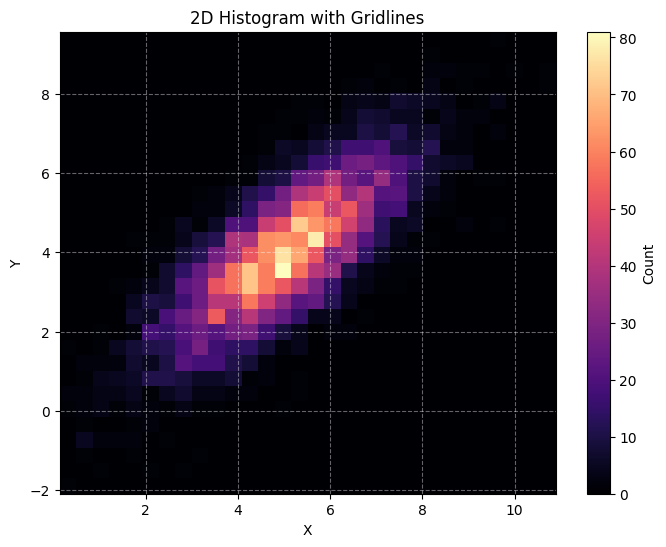

In [9]:
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap='magma')

plt.colorbar(label="Count")
plt.grid(color='white', linestyle='--', alpha=0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram with Gridlines")
plt.show()


### 2D Histogram + Contour Lines

ValueError: not enough values to unpack (expected at least 1, got 0)

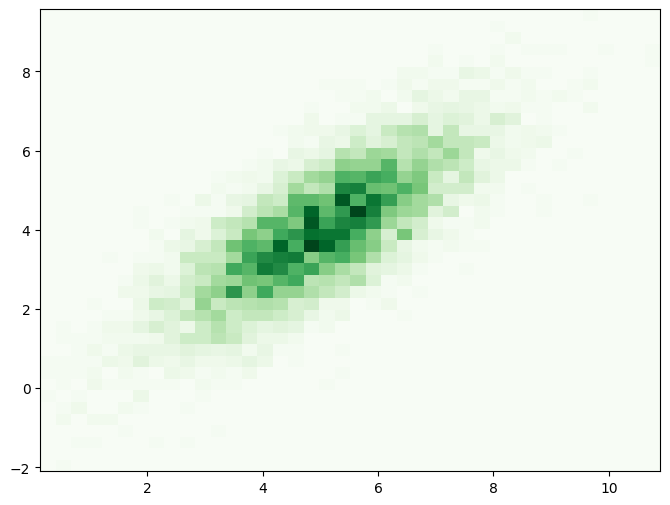

In [10]:
plt.figure(figsize=(8, 6))

# 2D histogram
plt.hist2d(x, y, bins=40, cmap='Greens')

# Contour lines
plt.tricontour(x, y, levels=10, colors='black', linewidths=0.8)

plt.colorbar(label="Count")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram with Contour Lines")
plt.show()


### 2D Histogram + KDE Contours (Smooth)

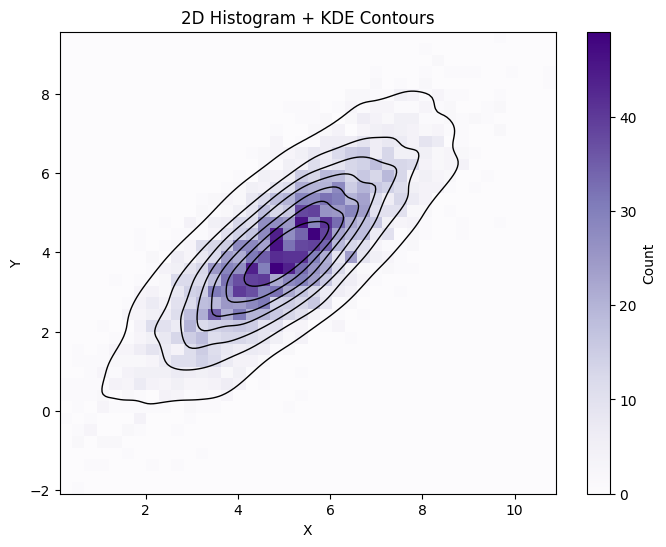

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=40, cmap='Purples')

sns.kdeplot(x=x, y=y, levels=8, color='black', linewidths=1)

plt.colorbar(label="Count")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram + KDE Contours")
plt.show()


### 3D Visualization of 2D Histogram

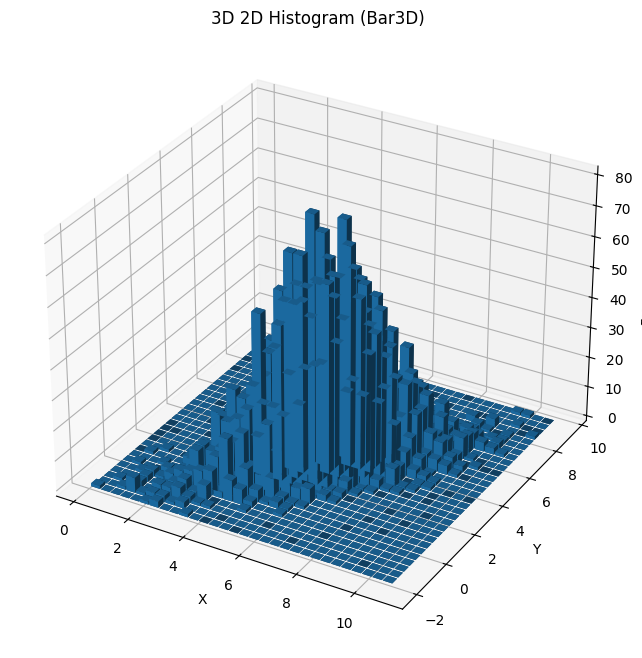

In [12]:
from mpl_toolkits.mplot3d import Axes3D

hist, xedges, yedges = np.histogram2d(x, y, bins=30)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = (xedges[1] - xedges[0]) * 0.9
dz = hist.ravel()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Frequency")
ax.set_title("3D 2D Histogram (Bar3D)")
plt.show()


### 2D Histogram Heatmap With Annotated Values

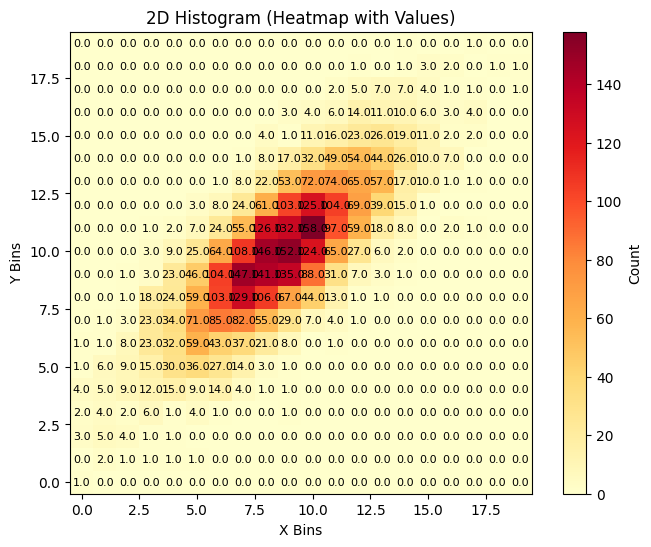

In [13]:
hist, xedges, yedges = np.histogram2d(x, y, bins=20)

plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin="lower", cmap="YlOrRd")

plt.colorbar(label="Count")
plt.xlabel("X Bins")
plt.ylabel("Y Bins")
plt.title("2D Histogram (Heatmap with Values)")

# Show numbers inside heatmap
for i in range(hist.shape[0]):
    for j in range(hist.shape[1]):
        plt.text(i, j, str(hist[i][j]),
                 ha='center', va='center', fontsize=8)

plt.show()


### Adaptive Binning 2D Histogram (Freedman–Diaconis Rule)

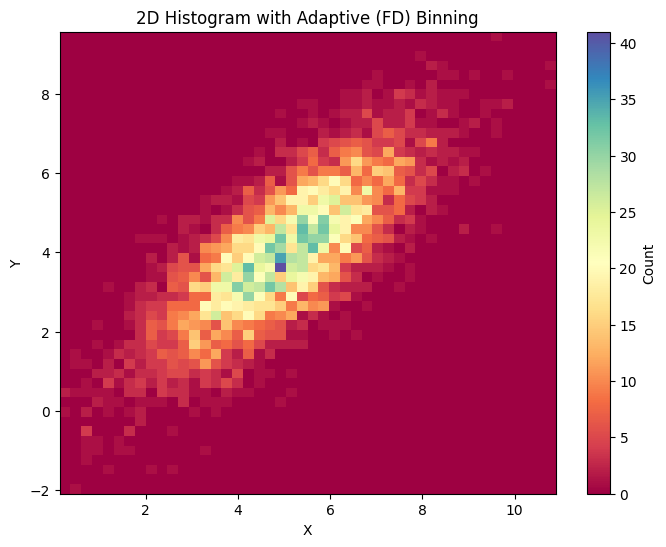

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def fd_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    bins = int((data.max() - data.min()) / bin_width)
    return max(bins, 5)

x_bins = fd_bins(x)
y_bins = fd_bins(y)

plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=[x_bins, y_bins], cmap='Spectral')

plt.colorbar(label="Count")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Histogram with Adaptive (FD) Binning")
plt.show()


### Scatter + 2D Histogram Hybrid

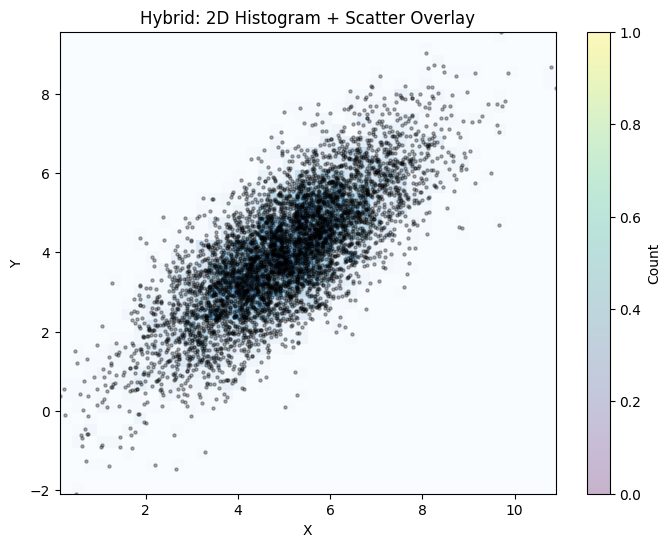

In [15]:
plt.figure(figsize=(8, 6))

plt.hist2d(x, y, bins=40, cmap='Blues', alpha=0.7)
plt.scatter(x, y, s=5, color="black", alpha=0.3)

plt.colorbar(label="Count")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Hybrid: 2D Histogram + Scatter Overlay")
plt.show()


### Joint Distribution (Seaborn JointGrid)

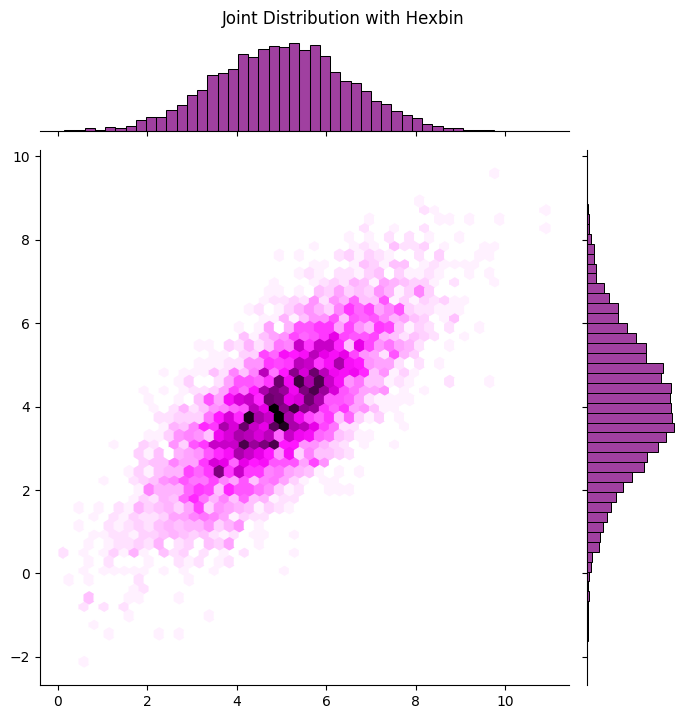

In [16]:
import seaborn as sns

sns.jointplot(x=x, y=y, kind="hex", color="purple", height=7)
plt.suptitle("Joint Distribution with Hexbin", y=1.02)
plt.show()


### Interactive 2D Histogram (Plotly)

In [18]:
! pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ------------------------------------ --- 8.9/9.9 MB 37.0 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 36.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
  

In [ ]:
# import sys
# !{sys.executable} -m pip install --upgrade nbformat


'c:\Users\Black' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
# import plotly.express as px

# fig = px.density_heatmap(
#     x=x,
#     y=y,
#     nbinsx=40,
#     nbinsy=40,
#     color_continuous_scale="Viridis",
#     title="Interactive 2D Histogram (Plotly)"
# )

# fig.show()


In [32]:
# fig = px.density_heatmap(
#     x=x,
#     y=y,
#     marginal_x="histogram",
#     marginal_y="histogram",
#     nbinsx=40,
#     nbinsy=40
# )
# fig.show()



### Marginal Histograms (Matplotlib)

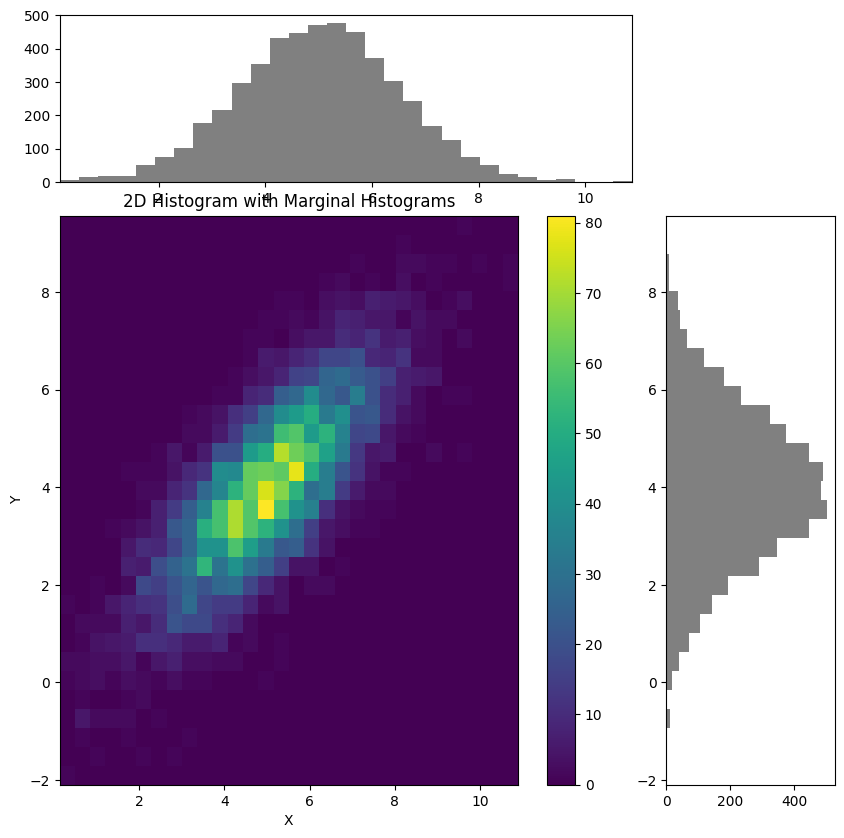

In [24]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yhist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# main 2D histogram
h = ax_main.hist2d(x, y, bins=30, cmap='viridis')

# top histogram
ax_xhist.hist(x, bins=30, color="gray")
# right histogram
ax_yhist.hist(y, bins=30, orientation='horizontal', color="gray")

plt.colorbar(h[3], ax=ax_main)
ax_main.set_xlabel("X")
ax_main.set_ylabel("Y")
ax_main.set_title("2D Histogram with Marginal Histograms")

plt.show()


### Animated 2D Histogram (Time-Evolving)

c:\Users\Black Parrot\OneDrive\Desktop\Github\DataAnalysis\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



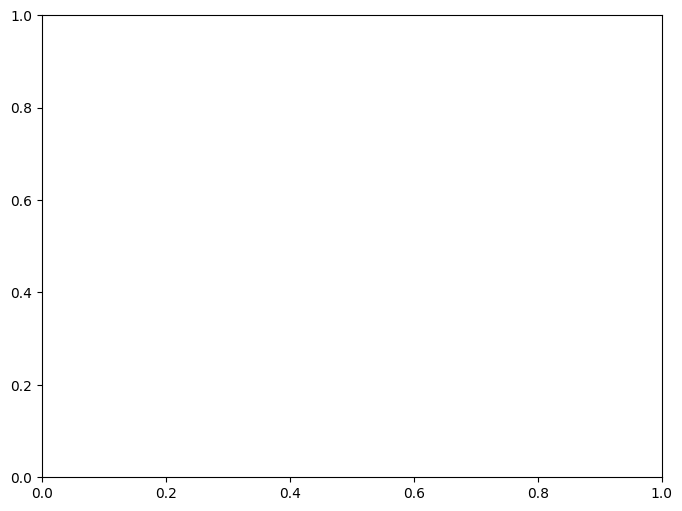

In [26]:
from matplotlib.animation import FuncAnimation

# Generate time-varying data
frames = 30
xs = [np.random.normal(5 + i*0.1, 1.5, 3000) for i in range(frames)]
ys = [0.7 * xs[i] + np.random.normal(0, 1, 3000) for i in range(frames)]

fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    ax.hist2d(xs[frame], ys[frame], bins=30, cmap="magma")
    ax.set_title(f"2D Histogram - Frame {frame}")

ani = FuncAnimation(fig, update, frames=frames, interval=200)
plt.show()


### Publication-Style 2D Histogram Settings

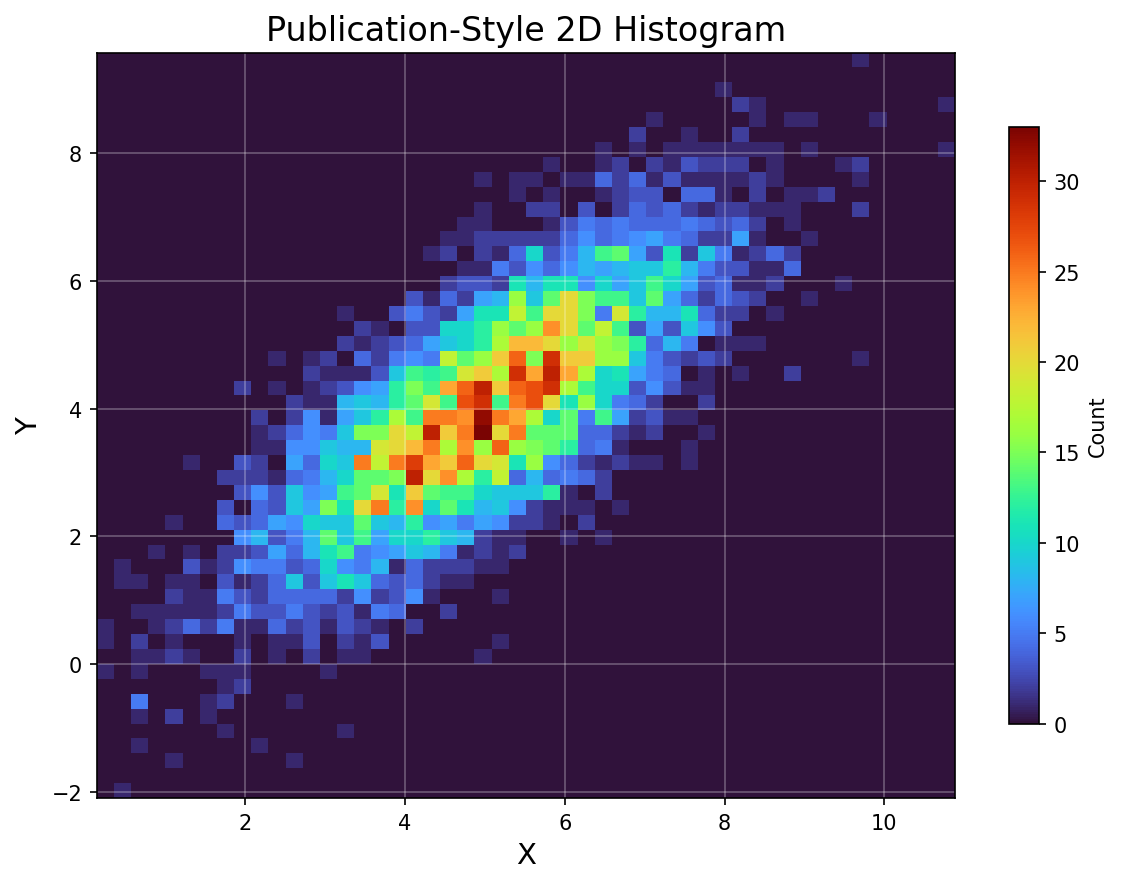

In [27]:
plt.figure(figsize=(8, 6), dpi=150)

plt.hist2d(
    x, y, 
    bins=50,
    cmap="turbo",
    density=False,
)

plt.colorbar(label="Count", shrink=0.8)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Publication-Style 2D Histogram", fontsize=16)

plt.grid(color='white', alpha=0.3)
plt.tight_layout()
plt.show()
